In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

url = 'https://gist.githubusercontent.com/zgulde/018f5d601efc79cb741a7aba92f51d29/raw/c08f1c09f605b43e9a354890f9dd68f296e76dc4/students.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,ml_coffee,syntax_errors,p_days_absent
0,16225,5.071306e+10,0.038821
1,18230,5.199823e+10,0.022748
2,15877,5.072630e+10,0.036627
3,8263,4.907919e+10,0.041293
4,13935,5.145114e+10,0.081544


In [13]:
# plt rc sets defaults for matplotlib figures
plt.rc("font", size=13)
plt.rc("figure", figsize= (13,7))

Create a scatter plot of syntax_errors and ml_coffee. Make sure to give your visual an appropriate title and labels.

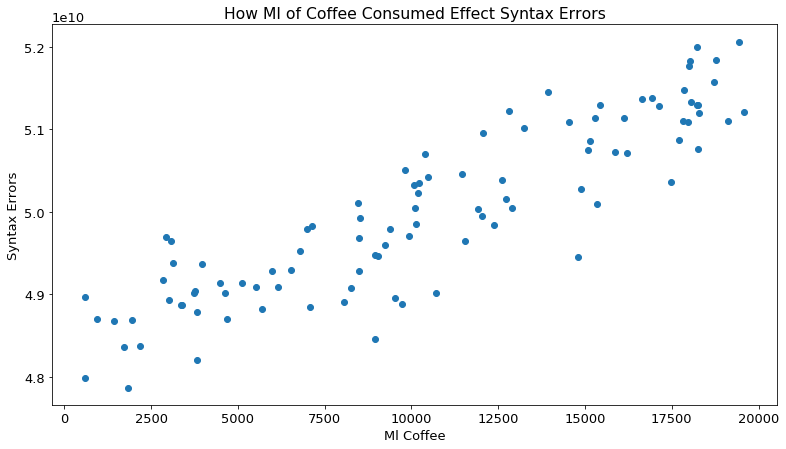

In [20]:
y= df.syntax_errors
x= df.ml_coffee
ax = plt.scatter(x, y)
plt.ylabel('Syntax Errors')
plt.xlabel('Ml Coffee')
plt.title('How Ml of Coffee Consumed Effect Syntax Errors')
plt.show()

In [26]:
df['syntax_errors_billions'] = df.syntax_errors / 1_000_000_000
df['cups_coffee'] = df.ml_coffee / 30 / 8
df.head()

,ml_coffee,syntax_errors,p_days_absent,sytanx_errors_billions,cups_coffee,syntax_errors_billions
0,16225,5.071306e+10,0.038821,50.713056,67.604167,50.713056
1,18230,5.199823e+10,0.022748,51.998229,75.958333,51.998229
2,15877,5.072630e+10,0.036627,50.726303,66.154167,50.726303
3,8263,4.907919e+10,0.041293,49.079192,34.429167,49.079192
4,13935,5.145114e+10,0.081544,51.451136,58.062500,51.451136


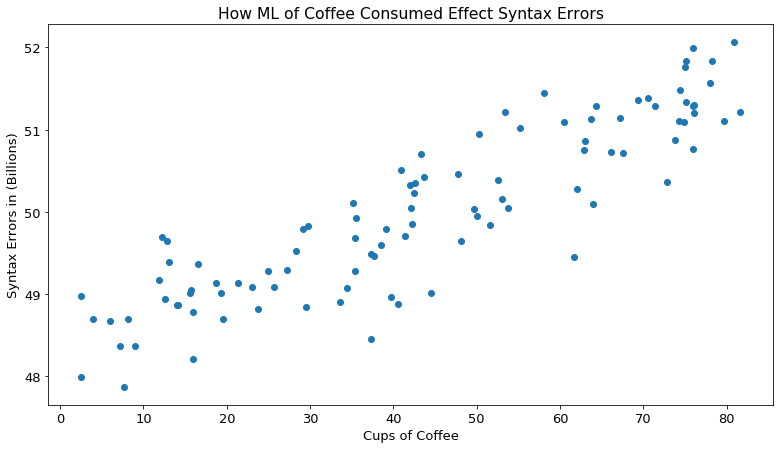

In [37]:
x= df.cups_coffee
y= df.syntax_errors_billions

plt.scatter(x, y)
plt.xlabel('Cups of Coffee')
plt.ylabel('Syntax Errors in (Billions)')
plt.title('How ML of Coffee Consumed Effect Syntax Errors')
plt.show()

[Text(0, 0.5, '# of Syntax Errors (billions)'),
 Text(0.5, 0, 'Coffee Consumption (cups)'),
 Text(0.5, 1.0, 'Students that drink more coffee tend to make more syntax errors')]

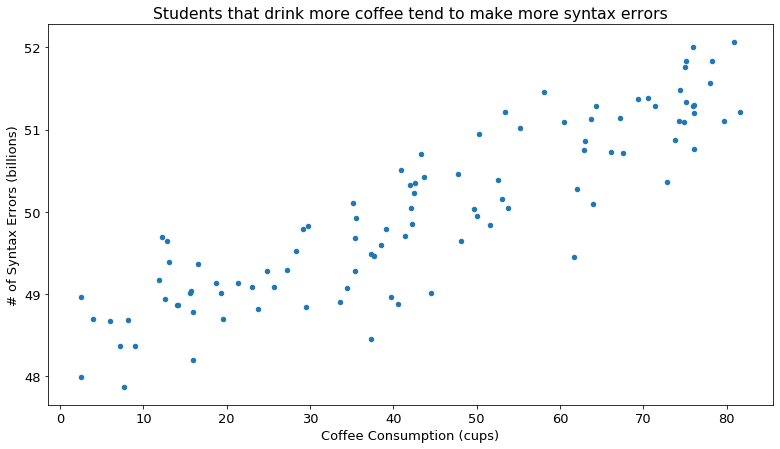

In [36]:
ax = df.plot.scatter(y='syntax_errors_billions', x='cups_coffee', figsize=(13, 7))
ax.set(
    xlabel='Coffee Consumption (cups)',
    ylabel='# of Syntax Errors (billions)',
    title='Students that drink more coffee tend to make more syntax errors',
)

Create a scatter plot of p_days_absent and ml_coffee. Make sure to give your visual an appropriate title and labels.

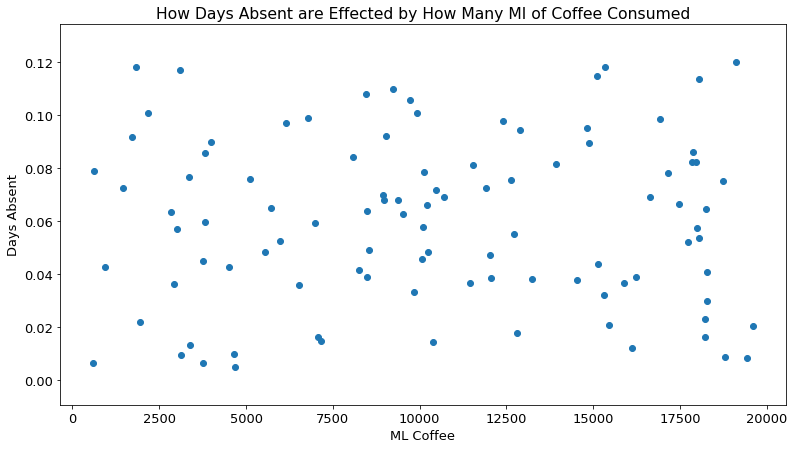

In [34]:
x= df.ml_coffee
y= df.p_days_absent

plt.scatter(x, y)
plt.xlabel('ML Coffee')
plt.ylabel('Days Absent')
plt.title('How Days Absent are Effected by How Many Ml of Coffee Consumed')
plt.show()

In [38]:
def format_y_tick(tick_value, position):
    return '{:.0%}'.format(tick_value)

def format_x_tick(tick_value, position):
    return '{:,}'.format(int(tick_value))

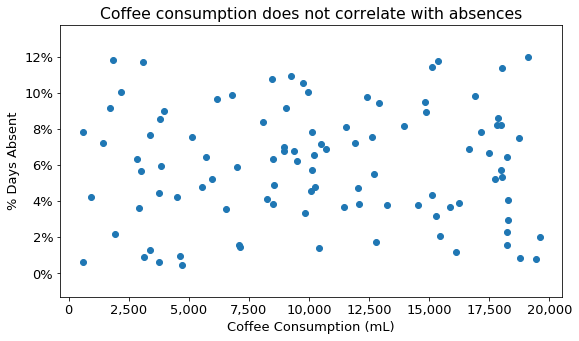

In [39]:
fig, ax = plt.subplots(figsize=(9, 5))

ax.scatter(df.ml_coffee, df.p_days_absent)
ax.set(
    xlabel='Coffee Consumption (mL)',
    ylabel='% Days Absent',
    title='Coffee consumption does not correlate with absences',
)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_y_tick))
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_x_tick))

### How to handle number presentation on x and y axis:

- domain-based scaling: e.g. divide by 1,000,000,000 and label as "billions", e.g. mL -> cups
- A custom function + mpl.ticker.FuncFormatter
- ax.get_xticks() + ax.set_xticks()